# Unit 4: Neural Networks: TensorFlow MNIST Fashion Data

## Assignment Requirements
- Load the data into Python.
- Do a brief summary of the data
- Display some of the images in the data set
- Use a Random Forest to classify the images
- Use one other technique other than Random Forests or Neural Networks to classify the images.
- Use Tensor Flow Neural Networks to classify the images.
- Calculate the TEST Data accuracy for all three models.
- For Full credit, you will need to achieve at least 90% classification accuracy on at least one of the models.
- FINALLY: Using the Tensor Flow function, save your mode. Then reload the model into a different object. Predict data using this new object in order to prove it was successfully loaded.

## Import Python Libraries

In [1]:
# Import the necessary libraries
import numpy as np
import time
import random
# ------
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
# ------
import tensorflow as tf
import matplotlib.pyplot as plt
# ------
print(tf.__version__)

2.15.0


## FASHION Data

| Label |   Class       |
|-------|---------------|   
| 0     | T-shirt/top   |
| 1     | Trouser       |
| 2     | Pullover      |
| 3     | Dress         |
| 4     | Coat          |
| 5     | Sandal        |
| 6     | Shirt         |
| 7     | Sneaker       |
| 8     | Bag           |
| 9     | Ankle boot    |

In [2]:
# Loan in Fashion MNIST dataset
mnist = tf.keras.datasets.fashion_mnist

# Define the class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Do a brief summary of the data

In [3]:
# Create the training and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the Data
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [4]:
# Display the shape of the training set
print(type(x_train))
print(x_train.shape)

print(type(y_train))
print(y_train.shape)

<class 'numpy.ndarray'>
(60000, 28, 28)
<class 'numpy.ndarray'>
(60000,)


Training data summary
x_train shape: (60000, 28, 28)
y_train shape: (60000,)


Test data summary
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


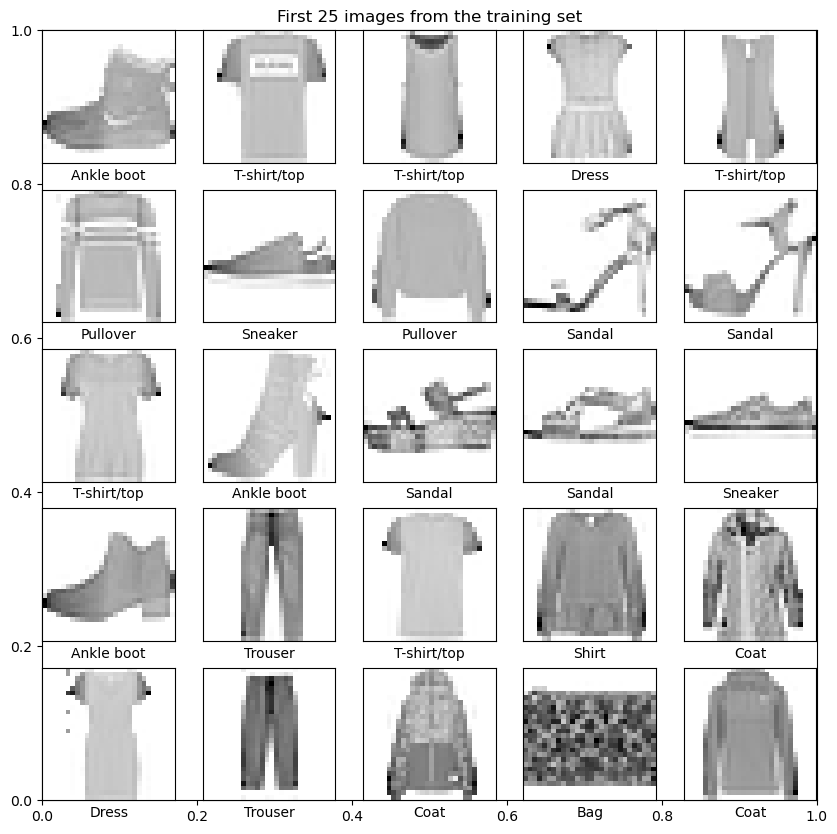

In [5]:
# Do a brief summary of the data
print('Training data summary')
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('\n')

print('Test data summary')
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

# Display the first 25 images from the training set
plt.figure(figsize=(10,10))
plt.title('First 25 images from the training set')
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
    
# Display the images
plt.show()

In [6]:
# Get the input shape and the total size of the data
INPUT_SHAPE = x_train[0].shape
print("Shape = ", INPUT_SHAPE)

TOTAL_SIZE = INPUT_SHAPE[0] * INPUT_SHAPE[1]
print("Total Size = ", TOTAL_SIZE)

Shape =  (28, 28)
Total Size =  784


In [7]:
# Define a function to display a random image from the training data
def getRandomIndex(DATA):
    return random.randint(0, DATA.shape[0])

who= 59871
0


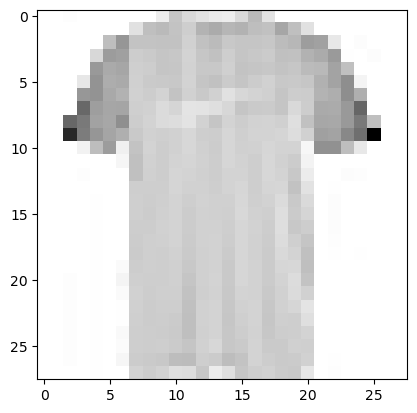

In [8]:
# Display a random image
who = 0
who = getRandomIndex(x_train)

# Print the image index being displayed
print('who=', who)

# Display the image 
print(y_train[who])
plt.imshow(x_train[who], plt.cm.binary)

## Solve The Image Classification Problem Using Random Forests

In [9]:
# Turn the 2D image into a 1D array
new_x_train = []
for i in x_train:
    new_x_train.append(i.flatten())
new_x_train = np.array(new_x_train)

new_x_test = []
for i in x_test:
    new_x_test.append(i.flatten())
new_x_test = np.array(new_x_test)

# Display the shape of the new training set
print(x_train.shape)
print(new_x_train.shape)

(60000, 28, 28)
(60000, 784)


In [10]:
# Create the Random Forest Classifier
theTrees = int(3*TOTAL_SIZE)
clf = RandomForestClassifier(n_estimators = theTrees)
clf.fit(new_x_train, y_train)

RandomForestClassifier(n_estimators=2352)

In [ ]:
# Test the Classifier
pred_train = clf.predict(new_x_train)
print(pred_train[0])
RF_acc_train = metrics.accuracy_score(y_train, pred_train)
print('Random Forest Training Accuracy:', RF_acc_train)

pred_test = clf.predict(new_x_test)
print(pred_test[0])
RF_acc = metrics.accuracy_score(y_test, pred_test)
print('Random Forest Testing Accuracy:', RF_acc)

## Solve The Image Classification Problem Using TensorFlow Neural Networks

In [ ]:
# Create the Neural Network model
theEpochs = 3
theActivation = tf.keras.activations.softplus
units_01 = int(2*TOTAL_SIZE)
units_02 = units_01

# Define the dense layers of the model
DENSE_LAYER_01 = tf.keras.layers.Dense(units=units_01, activation=theActivation)
DENSE_LAYER_02 = tf.keras.layers.Dense(units=units_02, activation=theActivation)
DENSE_LAYER_XX = tf.keras.layers.Dense(units=10, activation=tf.nn.softmax)

# Define the Dropout layer 
DROPOUT_LAYER = tf.keras.layers.Dropout(0.2)

# Define the optimizer and loss metric
theOptimizer = tf.keras.optimizers.Adam()
theLossMetric = tf.keras.losses.SparseCategoricalCrossentropy()

theSplit = 0.2
theBatchSize = 9
verboseFlag = True

theTensorFlowSaveFile = "TF_Number_Model"

In [ ]:
# Build the Model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=INPUT_SHAPE))
model.add(DENSE_LAYER_01)
# model.add(DROPOUT_LAYER)
# model.add(DENSE_LAYER_02)
model.add(DENSE_LAYER_XX)
model.compile(optimizer=theOptimizer, loss=theLossMetric, metrics=['accuracy'])
model.fit(x_train, y_train, epochs=theEpochs, validation_split=theSplit, batch_size=theBatchSize, verbose=verboseFlag)

In [ ]:
# Check the Model Accuracy on the Test Data Set
probs = model.predict(x_test)

pred_list = []
for i in probs:
    pred_list.append(np.argmax(i))
pred = np.array(pred_list)
acc_score = metrics.accuracy_score(y_test, pred)

for i in range(5):
    who = getRandomIndex(x_test)
    print('WHO = ', who, 'Prediction = ', pred[who], ' Actual = ', y_test[who])
    
print('-------------')
print('accuracy = ', acc_score)